In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVR
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import yfinance as yf

sns.set_theme()

In [2]:
aapl = yf.download('AAPL', start = '2020-01-01', end = '2025-05-01')

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


<Axes: xlabel='Date'>

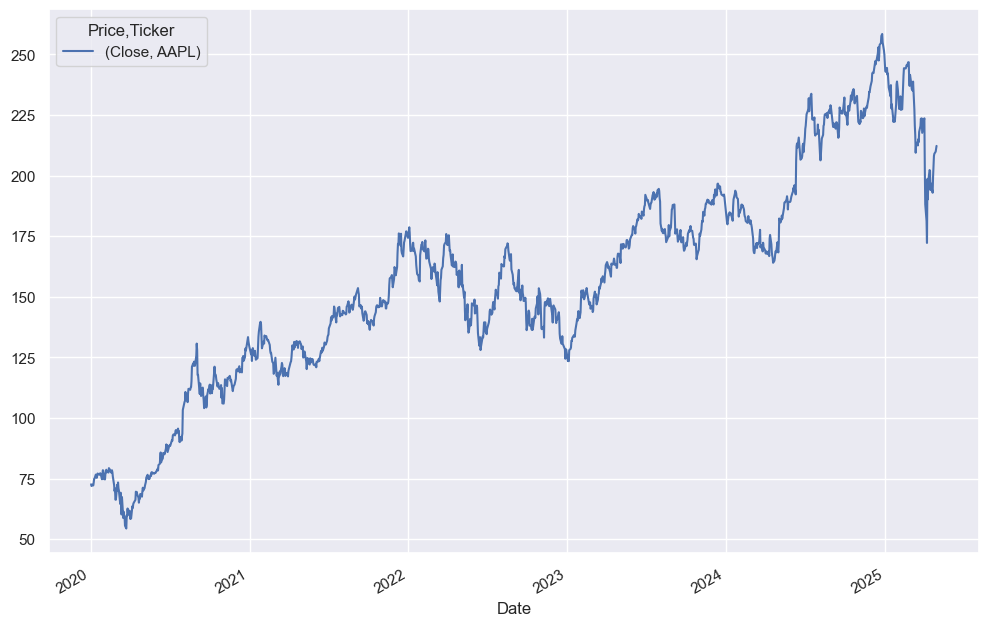

In [3]:
close_values = aapl[['Close']]
close_values.plot(kind = 'line', figsize=(12,8))

In [4]:
X_train, X_test = train_test_split(close_values, shuffle= False, test_size=0.2)

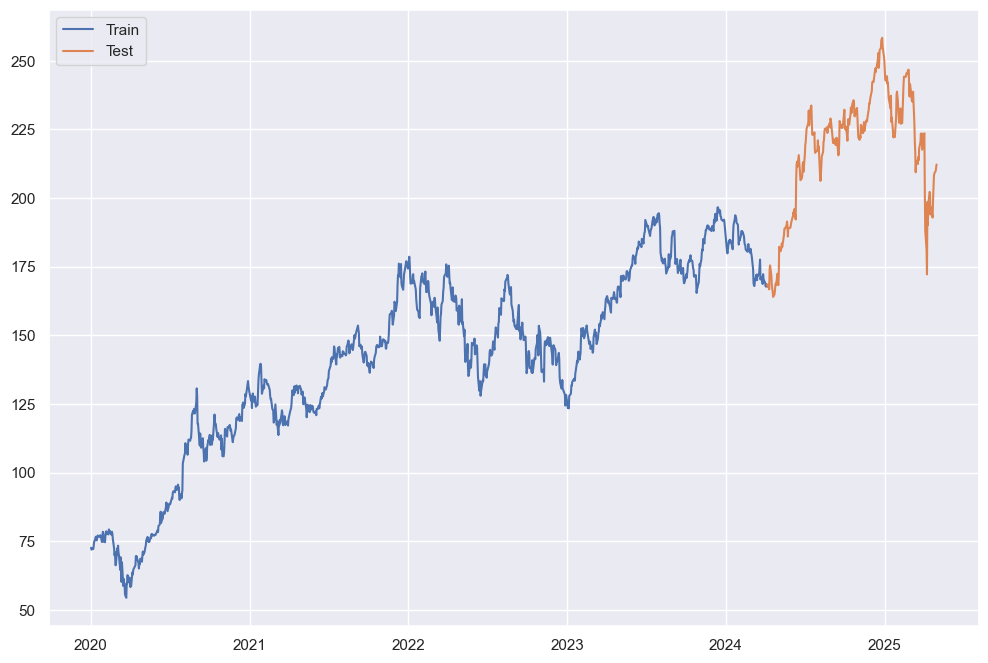

In [5]:
plt.figure(figsize=(12, 8))
plt.plot(X_train.index, X_train.values, label = "Train")
plt.plot(X_test.index, X_test.values, label = "Test")
plt.legend()


In [6]:
for lag in [1, 2, 3]:
    X_train[f"lag_{lag}"] = X_train['Close'].shift(lag)
    X_train[f"dif_{lag}"] = X_train['Close'].diff(lag)

X_train.dropna(inplace = True)


In [11]:
X = X_train.drop("Close", axis = 1).values
y = X_train['Close'].values

In [12]:
tscv = TimeSeriesSplit(n_splits = 5)
svr = SVR(kernel = 'linear')

In [13]:
param_grid = {
    "C": [0.1, 1, 10, 100],
    "gamma": ["scale", "auto", 0.01, 0.1, 1],
    "epsilon": [0.01, 0.1, 1]
}

grid_search = GridSearchCV(
    estimator=SVR(),
    param_grid=param_grid,
    cv=tscv,
    scoring="neg_mean_squared_error",
    n_jobs=-1
)
grid_search.fit(X, y)

c:\Users\dfdop\anaconda3\envs\quant\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
             estimator=SVR(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'epsilon': [0.01, 0.1, 1],
                         'gamma': ['scale', 'auto', 0.01, 0.1, 1]},
             scoring='neg_mean_squared_error')

In [14]:
best_svr = grid_search.best_estimator_